#### [PREVIOUS](3.CSV_course_specification.ipynb) | [HOME](../README.md) | [NEXT](5.export_import_course_specification.ipynb)

---

### CSV Course Specifications

This Jupyter Notebook is a demonstration of the course specifications linear regression algorithm that imports the training data from a SQLite3 database. This allows students to use larger or dynamic datasets.

This can also be viewed as a Python script in [4.SQL.py](\py_scripts\4.SQL.py).

#### Step 1

Load the five required dependencies:
- [numpy](https://numpy.org/) a comprehensive library of mathematical functions, random number generators, linear algebra routines, Fourier transforms, and more.
- [Scikit-learn](https://scikit-learn.org/stable/) a user friendly library of simple and efficient tools for predictive data analysis.
- [Matplotlib](https://matplotlib.org) a comprehensive library for creating static, animated, and interactive visualizations in Python. A customised stylesheet for the visualisations is also applied.
- [Pandas](https://pandas.pydata.org/) is library for data analysis and manipulation.
- [SQLite3](https://docs.python.org/3/library/sqlite3.html) a library for interfacing with a SQLite3 serverless SQL database.

In [3]:
# Import frameworks
import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.linear_model import LinearRegression

####  Step 2
- Open the [SQLite3](4.SQLite3.db) database file
- Migrate the data to
    - Training features into the `x` variable as a 2D array object.
    - Example targets into the `y` variable as a 1D array object.

In [4]:
# Create the data for the feature and target
con = sql.connect("data/4.SQLite3.db")
cur = con.cursor()
col_0 = "feature"
col_1 = "target"
x = np.array(cur.execute(f"SELECT {col_0} FROM data").fetchall())
y = np.array(cur.execute(f"SELECT {col_1} FROM data").fetchall()).flatten()
con.close()

#### Step 3

Apply your Python skills and query the data set about how many training examples there are and inspect a sample of the data.

In [5]:
m = len(x)
print(f"Number of training examples is: {m}")
table = pd.DataFrame({
    col_0: x.flatten(),  # Flatten x for easy display
    col_1: y
})
print(table.head())

Number of training examples is: 8
   feature  target
0        2       1
1        4       3
2        6       5
3        8       7
4       10       9


#### Step 4

Plot the feature `x` and target `y` data on a graph using the column headings as the graph labels.

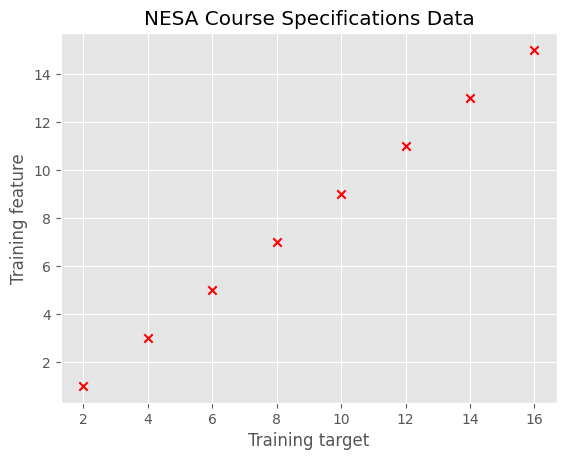

In [6]:
# Plot the data points
plt.scatter(x, y, marker='x', c='r')
# Set the title
plt.title("NESA Course Specifications Data")
# Set the y-axis label
plt.ylabel(f'Training {col_0}')
# Set the x-axis label
plt.xlabel(f'Training {col_1}')
plt.show()

#### Step 5

Use the [Scikit-learn](https://scikit-learn.org/stable/) library to instantiate a Machine Learning model class and store it in the `my_model` variable as an object.

In [7]:
# Create the model
my_model = LinearRegression()

#### Step 6

Use the [sklearn](https://scikit-learn.org/stable/) library to fit the model to the training data which will provide a line of best fit with the lowest cost based on a [sklearn](https://scikit-learn.org/stable/) algorithm.

In [8]:
# Fit the model to the data
my_model.fit(x, y)

LinearRegression()

#### Step 7

Plot the features, targets and model (linear regression).

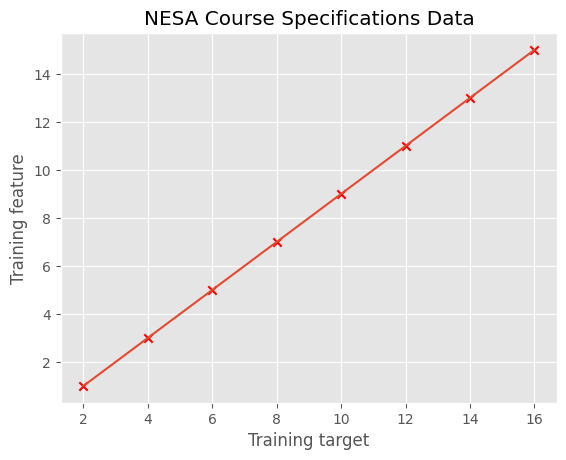

In [9]:
y_pred = my_model.predict(x)
plt.plot(x, y_pred)
plt.scatter(x, y, marker='x', c='r')
plt.title("NESA Course Specifications Data")
plt.ylabel(f'Training {col_0}')
plt.xlabel(f'Training {col_1}')
plt.show()

#### Step 8

Use the model for predictions and plot them on the visualisation.

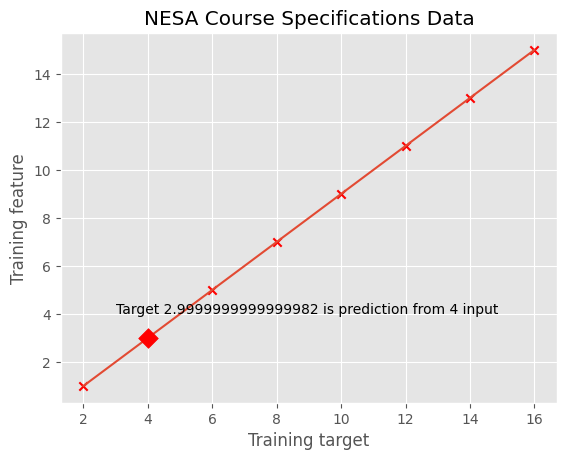

In [10]:
predict = np.array([[4]])
y_prediction = my_model.predict(predict)

y_pred = my_model.predict(x)
plt.plot(x, y_pred)
plt.scatter(x, y, marker='x', c='r')
plt.scatter(predict, y_prediction, marker='D', c='r', zorder=10, s=100)
plt.text(y_prediction, predict, f"Target {y_prediction[0]} is prediction from {predict[0,0]} input")
plt.title("NESA Course Specifications Data")
plt.ylabel(f'Training {col_0}')
plt.xlabel(f'Training {col_1}')
plt.show()


#### Step 9

Change the training data in in the [CSV file](course_specifications_data.csv), reload the data in 'Step 2', retrain the model in 'Step 6', evaluate the model in 'Step 7' and make predictions in 'Step 8'.